In [1]:
# csv 파일을 로딩
import pandas as pd
df = pd.read_csv("c:/data/concrete/concrete.csv")
print(df.head())

   cement   flag    ash  water  superplastic  coarseagg  findagg  age  \
0   164.2    0.0  200.1  181.2          12.6      849.3    846.0   28   
1   164.0    0.0  200.0  181.0          13.0      849.0    846.0   28   
2   158.0    0.0  195.0  220.0          11.0      898.0    713.0   28   
3   144.0   15.0  195.0  176.0           6.0     1021.0    709.0   28   
4   167.0  187.0  195.0  185.0           7.0      898.0    636.0   28   

   strength  class  
0     15.09      0  
1     15.09      0  
2      8.54      0  
3     15.34      0  
4     23.89      0  


In [2]:
train_cols = df.columns[:-2]
X = df[train_cols] # 독립변수
y = df["class"]
print(type(X), type(y))
print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
   cement   flag    ash  water  superplastic  coarseagg  findagg  age
0   164.2    0.0  200.1  181.2          12.6      849.3    846.0   28
1   164.0    0.0  200.0  181.0          13.0      849.0    846.0   28
2   158.0    0.0  195.0  220.0          11.0      898.0    713.0   28
3   144.0   15.0  195.0  176.0           6.0     1021.0    709.0   28
4   167.0  187.0  195.0  185.0           7.0      898.0    636.0   28
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


In [3]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [4]:
df_samp["class"].value_counts()

0    507
1    507
Name: class, dtype: int64

In [5]:
train_cols = df_samp.columns[:8]
X = df_samp[train_cols] # 독립변수
y = df_samp["class"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)


In [8]:
from tensorflow.keras import Sequential
from keras.layers import Dense
# class 클래스(상위클래스)
class MyModel(Sequential):
    # 초기화 함수
    def __init__(self, input_nodes, hidden_layers,num_classes):
        # 상위클래스의 초기화함수
        super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.add(Dense(hidden_layers[0], input_shape=(input_nodes,), activation='relu'))
        self.add(Dense(hidden_layers[1], activation='relu'))
        self.add(Dense(hidden_layers[2], activation='relu'))
        self.add(Dense(num_classes, activation='sigmoid'))
model = MyModel(len(X_train.columns), [128,64,32],1)
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

In [16]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

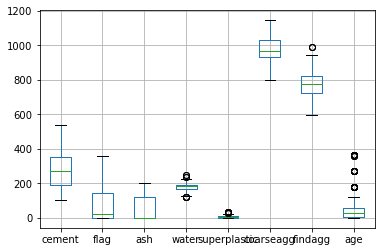

In [9]:
X_train.boxplot()

<AxesSubplot:>

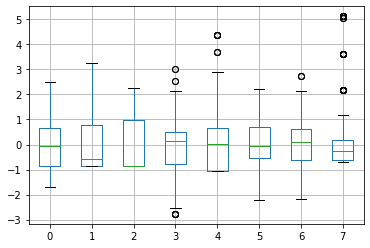

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)
X_train_scaled.boxplot()

In [11]:
# 5. 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500)


Epoch 1/500
26/26 [==============================] - 2s 5ms/step - loss: 0.1935 - accuracy: 0.7756
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 0.1265 - accuracy: 0.8348
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 0.1047 - accuracy: 0.8705
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0992 - accuracy: 0.8829
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0965 - accuracy: 0.8755
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0927 - accuracy: 0.8853
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0891 - accuracy: 0.8853
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0853 - accuracy: 0.8890
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0832 - accuracy: 0.8952
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0838 - accuracy: 0.8866
Epoch 11/

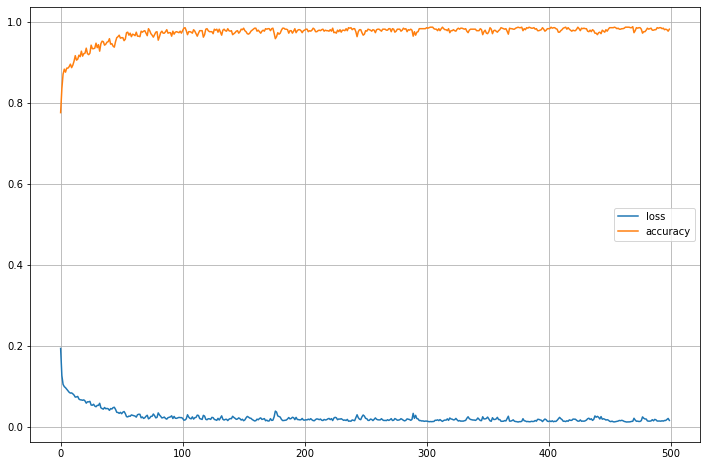

In [12]:
import matplotlib.pyplot as plt
# 6. 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [13]:
# 7. 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores) #학습용
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores) #검증용


26/26 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.9827
[0.01479937881231308, 0.9827373623847961]
7/7 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9310
[0.05993670970201492, 0.931034505367279]


In [14]:
#새로운 데이터에 대한 분류
import numpy as np
pred=model.predict(X_test_scaled)
print(pred[0])
print(np.round(pred[0]))
y_pred=[]
for pr in pred:
    if pr>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(y_pred)

7/7 [==============================] - 0s 3ms/step
[1.]
[1.]
[1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0]


In [15]:
#정오분류표
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[92,  9],
       [ 5, 97]], dtype=int64)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       101
           1       0.92      0.95      0.93       102

    accuracy                           0.93       203
   macro avg       0.93      0.93      0.93       203
weighted avg       0.93      0.93      0.93       203

